# Домашняя работа №2
Панов А.А, Шестаков А.В. Майнор по анализу данных 2016

<hr\>
**Общая информация**

**Срок сдачи:** 12 марта 2016, 23:59 <br\>
**Штраф за опоздание:** -0.5 за каждый день

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [minor-da-16] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

## 1. Теория веротяностей. Распределения

В SciPy более 80 видов непрерывных и более 12 дискретных распределений, более 70 статистических функций

In [1]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

**Задача 1.** Сгенерируйте три распределения: гауссовское с мат. ожиданием 1 и дисперсией 4, хи-квадрат с $k = 3$ и дискртеное пуассоновское с $\lambda = 10$.<br/> 

При генерации используйте 500 точек. Посчитайте для каждого из них обчный набор статистик: среднее, минимум, максимум, дисперсию, кривизну и смещенность.

In [2]:


normal = stats.norm.rvs(loc = 1, scale = 2, size = 500)
chi2 = stats.chi2.rvs(df = 3, size = 500)
poisson = stats.poisson.rvs(10, size = 500)
distr = (normal, chi2, poisson)
k = 0
for i in distr:
    if k == 0:
        print('Нормальное распределение')
    elif k == 1:
        print('Хи-квадрат')
    else:
        print('Пуассоновское распределение')
    k += 1
    print('Среднее', np.mean(i))
    print('Минимум', min(i))
    print('Максимум', max(i))
    print('Дисперсия', np.var(i))
    print('Кривизна', stats.kurtosis(i))
    print('Смещённость', stats.skew(i))
    print('\n')


Нормальное распределение
Среднее 1.05817302934
Минимум -5.6289578104
Максимум 7.21700313552
Дисперсия 3.9949785507
Кривизна -0.022203907150783575
Смещённость 0.0026565621290314807


Хи-квадрат
Среднее 2.90050839357
Минимум 0.00396869724689
Максимум 12.9882135008
Дисперсия 5.37442589971
Кривизна 1.6974407926853718
Смещённость 1.2870839864468828


Пуассоновское распределение
Среднее 9.842
Минимум 3
Максимум 19
Дисперсия 8.805036
Кривизна -0.21781227734386865
Смещённость 0.15338405935474603




**Задача 2.** Найрисуйте функцию (cdf) и плотность (pdf) распределений. На графиках pdf отметьте среднее значение и медиану.

Зелёная линия - среднее, белая линия - медиана


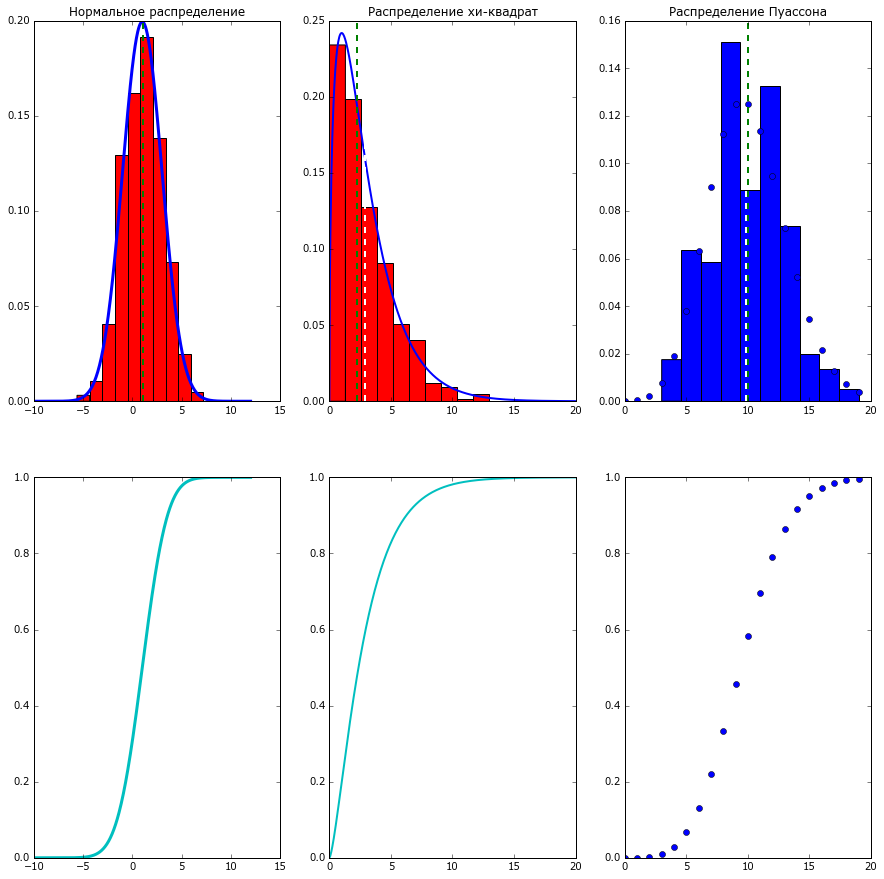

In [3]:
from scipy.stats import norm
font = {'family': 'Verdana',
'weight': 'normal'}
plt.rc('font', **font)

x = np.linspace(-10, 12, 500)
x1 = np.linspace(0, 20, 500)
x2 = np.arange(-0, 20)

m = [np.mean(normal), np.median(normal)]
m1 = [np.mean(chi2), np.median(chi2)]
m2 = [np.mean(poisson), np.median(poisson)]


fig, ax = plt.subplots(2, 3)
fig.set_size_inches(15, 15)

ax[0, 0].plot(x, stats.norm.pdf(x, 1, 2), 'b', lw = 3)
ax[0, 0].hist(normal, color = 'r', normed = True)
ax[1, 0].plot(x, stats.norm.cdf(x, 1, 2), 'c', lw = 3)
ax[0,0].axvline(m[0], color = 'w', linestyle = '--', lw = 2)
ax[0,0].axvline(m[1], color = 'g', linestyle = '--', lw = 2)

ax[0, 1].plot(x1, stats.chi2.pdf(x1, 3), 'b', lw = 2)
ax[0, 1].hist(chi2, color = 'r', normed = True)
ax[1, 1].plot(x1, stats.chi2.cdf(x1, 3), 'c', lw = 2)
ax[0,1].axvline(m1[0], color = 'w', linestyle = '--' , lw = 2)
ax[0,1].axvline(m1[1], color = 'g', linestyle = '--', lw = 2)

ax[0, 2].plot(x2, stats.poisson.pmf(x2, 10), 'bo', lw = 2)
ax[0, 2].hist(poisson, normed = True)
ax[1, 2].plot(x2, stats.poisson.cdf(x2, 10), 'bo', lw = 2)
ax[0,2].axvline(m2[0], color = 'w', linestyle = '--', lw = 2)
ax[0,2].axvline(m2[1], color = 'g', linestyle = '--', lw = 2)

ax[0, 0].set_title('Нормальное распределение')
ax[0, 1].set_title('Распределение хи-квадрат')
ax[0, 2].set_title('Распределение Пуассона')

print('Зелёная линия - среднее, белая линия - медиана')

**Задача 3.** Выведите описательные статистики распределений с помощью `scipy.stats.describe`. 

In [4]:
k = 0
for i in distr:
    if k == 0:
        print('Нормальное распределение')
    elif k == 1:
        print('Хи-квадрат')
    else:
        print('Пуассоновское распределение')
    k += 1
    print(sp.stats.describe(i))
    print('\n')

Нормальное распределение
DescribeResult(nobs=500, minmax=(-5.628957810397818, 7.2170031355249096), mean=1.0581730293353659, variance=4.0029845197372804, skewness=0.0026565621290314807, kurtosis=-0.022203907150783575)


Хи-квадрат
DescribeResult(nobs=500, minmax=(0.0039686972468865912, 12.988213500815892), mean=2.9005083935746572, variance=5.3851962922978922, skewness=1.2870839864468828, kurtosis=1.6974407926853718)


Пуассоновское распределение
DescribeResult(nobs=500, minmax=(3, 19), mean=9.8420000000000005, variance=8.8226813627254508, skewness=0.15338405935474603, kurtosis=-0.21781227734386865)




## 2. Теория вероятностей. Корреляция и метод максимального правдоподобия

Корреляции с помощью ивестных вам пакетов можно посчитать несколькими способами: pandas.DataFrame.corr и numpy.correlate, numpy.corrcoef и scipy.stats.pearsonr для корреляционного коэффициента Пирсона, scipy.stats.spearmanr для корреляционного коэффициента Спирмена.

Объясните [разницу](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/) между коэффициентами корреляции Спирмена и Пирсона.

In [15]:
#Если одна перменная зависист от другой монотонно, то коэффициент Спирмена всегда будет равен единице, хотя коэффициент Пирсона может отличаться от единицы.

В данных из файла [beauty.csv](https://www.dropbox.com/s/xio77e9p0oe1wqw/beauty.csv?dl=0) для каждого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

**Задание 1.** Найдите 3 пары признаков с наибольшей корреляцией. Поясните на конктретных примерах, что означают полученные коэффициенты корреляции.

In [5]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

df = pd.read_csv('beauty.csv', sep=';')
table = df.corr(method='pearson')
np.fill_diagonal(table.values, 0)
x = table.stack().nlargest(6)
x1 = x.drop_duplicates()
y = table.stack().nsmallest(6)
y1 = y.drop_duplicates()
print(x1, '\n', y1)
## Не совсем ясно, что значит "с наибольшей корреляцией". Если подразумевалась только положительная corr, то только первые три. Если подразумевалась
## по модулю, то следует оставить nlargest(2), n.smallest(4). 
## Из всех полученных корреляций, логичной представляется exper - married. Потому что обе переменные зависят от возраста человека, чем больше возраст
## Тем больше у человека опыт работы и тем больше вероятность, что он уже женат/замужем.

service  educ       0.301628
female   service    0.267961
exper    married    0.255607
dtype: float64 
 female  married   -0.319228
wage    female    -0.313419
exper   female    -0.247209
dtype: float64


**Задание 2.** На семинаре мы рассмотрели различные распрелеления случайных величин (дискретные и непрерывные). 

Изобразите гистограммы каждого из признаков.<br/>
Определите возможный закон распределения каждого из них и оцените его параметры. Если готовой функции в scipy.stats для распределения нет, то оцените эти параметры сами по методу максимального правдоподобия.

Зарплата DescribeResult(nobs=500, minmax=(1.0495582128823091, 31.196258156823394), mean=16.12290818485285, variance=76.191223842561342, skewness=3.511453344092871e-16, kurtosis=-1.2000096000384004)
Опыт работы DescribeResult(nobs=500, minmax=(1.0008352854915792, 60.560518056463486), mean=30.780676670977531, variance=297.39259107747603, skewness=0.0, kurtosis=-1.2000096000384)
Образование DescribeResult(nobs=500, minmax=(6.4604405895010162, 18.666543537483111), mean=12.563492063492063, variance=12.490489251305776, skewness=9.91919490487831e-16, kurtosis=-1.2000096000383997)
Внешность DescribeResult(nobs=500, minmax=(1.5930835380801078, 4.7783450333484634), mean=3.1857142857142859, variance=0.85058080212074783, skewness=-7.994728127791316e-16, kurtosis=-1.2000096000384002)


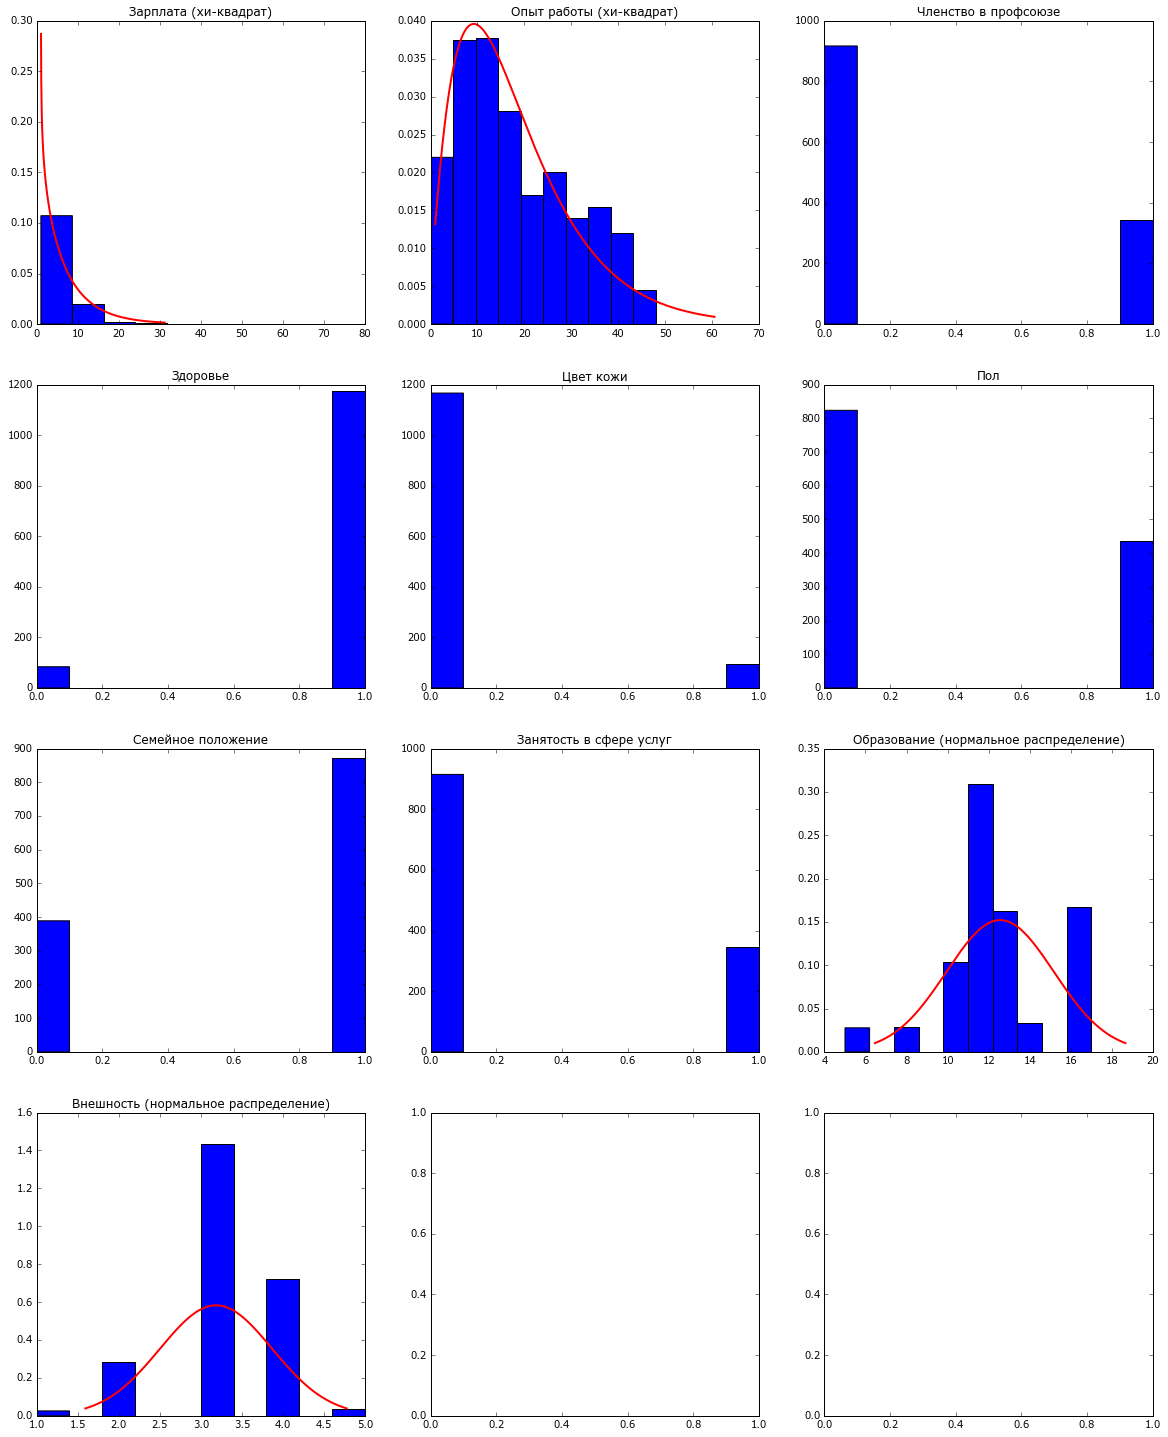

In [6]:
fig, ax = plt.subplots(4,3)
fig.set_size_inches(20, 25)

w_p = stats.chi2.fit(df['wage'])
w_d = np.linspace(stats.chi2.ppf(0.01, w_p[0], w_p[1], w_p[2]), stats.chi2.ppf(0.99, w_p[0], w_p[1], w_p[2]), 500)

e_p = stats.chi2.fit(df['exper'])
e_d = np.linspace(stats.chi2.ppf(0.01, e_p[0], e_p[1], e_p[2]), stats.chi2.ppf(0.99, e_p[0], e_p[1], e_p[2]), 500)

l_p = stats.norm.fit(df['looks'])
l_d = np.linspace(stats.norm.ppf(0.01, l_p[0], l_p[1]), stats.norm.ppf(0.99, l_p[0], l_p[1]), 500)

ed_p = stats.norm.fit(df['educ'])
ed_d = np.linspace(stats.norm.ppf(0.01, ed_p[0], ed_p[1]), stats.norm.ppf(0.99, ed_p[0], ed_p[1]), 500)

ax[0, 0].hist(df['wage'], normed = True)
ax[0, 0].set_title('Зарплата (хи-квадрат)')
ax[0, 0].plot(w_d, stats.chi2.pdf(w_d, w_p[0], w_p[1], w_p[2]), 'r', lw = 2)


ax[0, 1].hist(df['exper'], normed = True)
ax[0, 1].set_title('Опыт работы (хи-квадрат)')
ax[0, 1].plot(e_d, stats.chi2.pdf(e_d, e_p[0], e_p[1], e_p[2]), 'r', lw = 2)

ax[0, 2].hist(df['union']) ## Для бинарных пытаться подобрать распределение бессмысленно
ax[0, 2].set_title('Членство в профсоюзе')

ax[1, 0].hist(df['goodhlth'])
ax[1, 0].set_title('Здоровье')

ax[1, 1].hist(df['black'])
ax[1, 1].set_title('Цвет кожи')

ax[1, 2].hist(df['female'])
ax[1, 2].set_title('Пол')

ax[2, 0].hist(df['married'])
ax[2, 0].set_title('Семейное положение')

ax[2, 1].hist(df['service'])
ax[2, 1].set_title('Занятость в сфере услуг')

ax[2, 2].hist(df['educ'], normed = True)
ax[2, 2].set_title('Образование (нормальное распределение)')
ax[2, 2].plot(ed_d, stats.norm.pdf(ed_d, ed_p[0], ed_p[1]), 'r', lw = 2)

ax[3, 0].set_title('Внешность (нормальное распределение)')
ax[3, 0].hist(df['looks'], normed = True)
ax[3, 0].plot(l_d, stats.norm.pdf(l_d, l_p[0], l_p[1]), 'r', lw = 2)
print('Зарплата', sp.stats.describe(w_d))
print('Опыт работы', sp.stats.describe(e_d))
print('Образование', sp.stats.describe(ed_d))
print('Внешность', sp.stats.describe(l_d))

## 3. Метод наивного Байеса

Пояснения по выполнению этого задания будут рассказаны на семинаре 1 марта

Обучение методом наивного Байеса основывается на достаточно сильном предположении, что все признаки попарно независимы. По формуле Байеса $$P(y|x_1,\dots,x_n)=\frac{P(y)P(x_1,\dots,x_n|y)}{P(x_1,\dots,x_n)}.$$ В предположении, что признаки независимы получаем, что $$P(y|x_1,\dots,x_n)=\frac{P(y)\prod_{i=1}^n P(x_i|y)}{P(x_1,\dots,x_n)}$$
Т.к. $$P(x_1,\dots,x_n)$$ задается условиями задачи, принцип максимального правдоподобия для наивного Байеса запишется следующим образом: $$\hat y = \arg\max_y P(y)\prod_{i=1}^n P(x_i|y).$$


Библиотека `sklearn` поддерживает несколько реализаций наивного Байеса: `sklearn.naive_bayes.GaussianNB`, `sklearn.naive_bayes.MultinomialNB` и др.

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

**Задание 1.** Выберите 2 категории новостных сообщений из `20newsgroups`. Случайным образом, в пропорции 70/30, разделите наборы текстов на обучающую и контрольную выборки. В результате выполнения данного задания у вас должно получится 5 переменных: `text_all`, `text_train`, `text_test`, `y_train`, `y_test`.

In [8]:
# Список новостных заголовков
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
categories = ['comp.sys.mac.hardware', 'talk.politics.mideast']
newsgroups_all = fetch_20newsgroups(subset = 'all', categories = categories) # Загружаем весь текст 

text_all = newsgroups_all.data #Выбирает только текст, без числовых признаков
text_train, text_test, y_train, y_test = train_test_split(newsgroups_all.data, newsgroups_all.target, test_size = 0.3) #первым двум
# переменным присваивается newsgroups_all.data (текст), последним двум - newsgroups_all.target (числовые признаки)
print(y_train)



[0 1 1 ..., 0 0 1]


**Задание 2.** На переменной `text` постройте конвертер из текстов в частотную матрицу с помощью метода `CountVectorizer(analyzer='word', stop_words='english', lowercase=True)`, а затем используйте его на выборках `train` и `test`. В результате вы должны получить 2 матрицы: `X_train` и `X_test`.

In [10]:
vect = CountVectorizer(analyzer = 'word', stop_words = 'english', lowercase = True)
vect.fit(text_all) #Создание из нашего текста "словаря"
X_train = vect.transform(text_train).toarray()
X_test = vect.transform(text_test).toarray()
print('X_train', '\n', X_train, '\n', 'X_test', '\n', X_test)

X_train 
 [[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]] 
 X_test 
 [[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


**Задание 3.** По матрице `X_train` найдите 50 самых частотных слов. Соответствия столбцов и слов можно понять по методу `CountVectorizer.get_feature_names()`.

In [11]:
df = pd.DataFrame({'Количество повторений':np.sum(X_train, axis = 0), 'Слово':vect.get_feature_names()}) #Создаём таблицу соответствий
df.sort_values(by = 'Количество повторений', ascending = False)[:50] #Сортируем её

,Количество повторений,Слово
10809,2818,edu
25975,1438,subject
17201,1402,lines
20168,1268,organization
20797,1135,people
29266,1009,writes
27933,954,university
4851,951,article
15723,924,israel
4766,853,armenian


**Задание 4.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=1` на выборке train. Примените его к данным из тестовой выборке и оцените точность совпадения меток.

In [12]:
clf = MultinomialNB(alpha = 1).fit(X_train, y_train) ##Fit Naive Bayes classifier according to X,  Х - тексты, у - числовые
prediction = clf.predict(X_test)  ##Классифицирует по категориям тестовую выборку и присавивает ей 1 и 0
prob = clf.predict_proba(X_test)  ##Return probability estimates for the test vector X.
print('точность совпадения меток = ', np.mean(prediction == y_test)) ## predict == y_test выдаёт совпадения в виде True/False. 
print('вероятности = ', prob)


точность совпадения меток =  0.989492119089
вероятности =  [[  1.00000000e+000   4.91649325e-058]
 [  1.00000000e+000   3.39620257e-021]
 [  1.00000000e+000   6.31075442e-122]
 ..., 
 [  0.00000000e+000   1.00000000e+000]
 [  1.00000000e+000   4.96186134e-067]
 [  9.96622933e-001   3.37706744e-003]]


**Задание 5.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=0` на выборке train. Примените его к данным из тестовой выборки и оцените точность совпадения меток. Поменяются ли результаты? Объясните почему?

Учитывайте не только метки, но и вероятности, которые выдает классификатор

In [13]:
clf1 = MultinomialNB(alpha = 0).fit(X_train, y_train)
prediction1 = clf1.predict(X_test)  
prob1 = clf1.predict_proba(X_test)
print('точность совпадения меток = ', np.mean(prediction1 == y_test)) 
print('вероятности = ', prob1)
prediction1
##Видно, что при изменении альфа, отсортированная тестовая выборка по категориям имеет только 0 в таблице. Т.е. строго говоря точность должна быть ноль.

точность совпадения меток =  0.509632224168
вероятности =  [[ nan  nan]
 [ nan  nan]
 [ nan  nan]
 ..., 
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,